<a href="https://colab.research.google.com/github/kmanisgithub/Hotel-Booking-Cancellation-And-Demand-Prediction/blob/main/Hotel_Booking_Cancellation_And_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Cancellation And Demand Prediction

### About Dataset
The dataset is fetched from kaggle and belongs to **MOJTABA (https://www.kaggle.com/datasets/mojtaba142/hotel-booking)**

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

<img src="https://storage.googleapis.com/kaggle-datasets-images/1437463/2378746/e31e8170a1e0c43cadb0eeb3f6af8159/dataset-cover.jpg?t=2021-06-29-05-38-03">


## Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is dealing with number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellation as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.


## Assumptions

1. No unusual occurrence between 2015 and 2017 will have a substantial impact on the dataset.
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manners.
3. There are no unanticipated negatives to the hotel employing any advised techniques.
4. The hotels are not currently using any of the suggested solution.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. clients make hotel reservations for the same year they make cancellations.


## Research Questions

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better ?
3. How will hotels be assisted in making pricing and promotional decisions ?


## Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Downloading the Dataset

In this Project, we'll analyze the Hotel booking demand datasets. You can find the raw data & official analysis here: https://www.kaggle.com/datasets/mojtaba142/hotel-booking.



There are several options for getting the dataset into Jupyter:

1. Download the CSV manually and upload it via Jupyter's GUI
2. Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
3. Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll go for the 3rd option to use the dataset in Jupyter.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/mojtaba142/hotel-booking'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: megie9165
Your Kaggle Key: ··········


100%|██████████| 4.40M/4.40M [00:00<00:00, 63.5MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './hotel-booking'

In [6]:
import os
os.listdir(data_dir)

['hotel_booking.csv']

# Data Preparation and Cleaning

In all data-analysis projects, the data preparation step is not only necessary but also vital to find and handle features that could cause some problems while making the quantitative analysis, or that could lead to low efficient coding. According to `Alivia Smith`, this step usually takes up to 80% of the entire time of a data analysis project.
Therefore, missing, invalid, and inconsistent values have been addressed.

As with any dataset, the first steps are going to be data exploration and data cleaning. We need to get a better understanding of what we're dealing with

> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

### Load the dataset into a data frame using Pandas

In [7]:
bookings_df = pd.read_csv('hotel-booking/hotel_booking.csv')

## Preliminary Data Exploration and Data Cleaning with Pandas

Now that we've got our data loaded into our dataframe, we need to take a closer look at it to help us understand what it is we are working with. This is always the first step with any data science project. Let's see if we can answer the following questions:

- 1. How many rows and columns does the dataset contain?

- 2. How many columns does it have?

- 3. What are the labels for the columns? Do the columns have names?

- 4. Are there any missing values in our dataframe?

- 5. Does our dataframe contain any bad data?

- 6. Are there any NaN values present?

- 7. Are there any duplicate rows?

- 8. What are the data types of the columns?


The first step as always is getting a better idea about what we're dealing with.

### Explore the number of rows & columns, ranges of values etc.

To see the number of rows and columns we can use the `shape` attribute:

In [8]:
bookings_df.shape

(119390, 36)

we are working with a fairly large DataFrame this time.
It tells us we have 119390 rows and 36 columns.

Now take a look at the Pandas dataframe we've just created with `.head()`.

In [9]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [10]:
bookings_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [11]:
# What are the labels for the columns? Do the columns have names?

bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

### How many columns does our dataframe have?

In [12]:
len(bookings_df.columns)

36

In [13]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can answer many of the questions with a single command: **.describe()**.

In [14]:
bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Converting the type of reservation_status_date column to datetime

To convert the reservation_status_date column to a DateTime object, all we need to do is call the **to_datetime()** function.

In [16]:
bookings_df['reservation_status_date']  = pd.to_datetime(bookings_df['reservation_status_date'])

In [17]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [18]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [19]:
bookings_df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [20]:
for col in bookings_df.describe(include="object").columns:
    print(col)
    print(bookings_df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [21]:
bookings_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
112015,City Hotel,0,150,2017,May,20,14,2,3,2,...,Transient,89.10,0,0,Check-Out,2017-05-19,Rachel Dalton,Rachel_D34@protonmail.com,327-787-4261,************9184
21717,Resort Hotel,0,49,2016,March,10,5,2,2,1,...,Transient-Party,66.00,0,0,Check-Out,2016-03-09,Lorraine Merritt,LMerritt40@verizon.com,979-116-9115,************6546
28203,Resort Hotel,0,233,2016,September,38,11,4,10,2,...,Contract,90.76,0,2,Check-Out,2016-09-25,Donald West,DWest@comcast.net,118-012-7236,************1039
43983,City Hotel,0,62,2015,September,40,27,4,5,2,...,Contract,131.51,0,3,Check-Out,2015-10-06,Kirk Smith IV,IV_Kirk@comcast.net,774-168-5969,************6035
48132,City Hotel,1,17,2016,March,12,17,1,3,2,...,Transient,97.00,0,0,Canceled,2016-03-13,Victoria Brown,Victoria.Brown@yahoo.com,284-441-6355,************3039


## Data Cleaning: Removing NaN Values and Duplicates


### Missing Values and Junk Data

Before we can proceed with our analysis we should try and figure out if there are any missing or junk data in our dataframe. That way we can avoid problems later on. In this case, we're going to look for NaN (Not A Number) values in our dataframe. NAN values are blank cells or cells that contain strings instead of numbers. Use the `.isna()` method.

In [22]:
bookings_df.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
bookings_df.isna().values.any()

True

In [24]:
bookings_df.duplicated().values.any()

False

We can see the total number of duplicates by creating a subset and looking at the length of that subset

In [25]:
duplicated_rows = bookings_df[bookings_df.duplicated()]
len(duplicated_rows)

0

In [26]:
bookings_df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

### Handling Null Values
We can see that for each of the columns, there are a lot different unique values for some of them.

In [27]:
bookings_df.isnull().values.any()

True

In [28]:
bookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [29]:
bookings_df.isnull().sum().sum()

129425

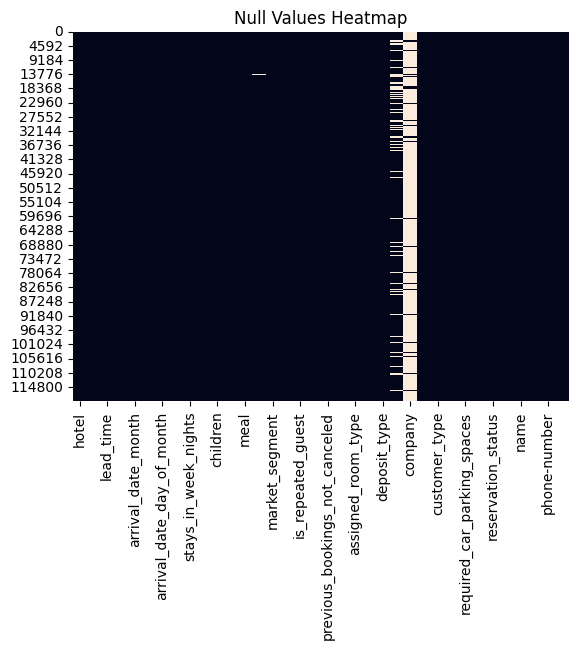

In [30]:
sns.heatmap(bookings_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

### Dropping Unused Columns and Removing NaN Values

To find and remove the rows with the NaN values we can create a subset of the DataFrame based on where `.isna()` evaluates to True. We see that NaN values in ratings are associated with no reviews (and no installs). That makes sense.

#### Remove the columns called company and agent from the DataFrame. We will not use these columns.

To remove the unwanted columns, we simply provide a list of the column names `['company'], [‘agent']` to the `.drop()` method. By setting axis=1 we are specifying that we want to drop certain columns.

In [31]:
bookings_df.drop(['company', 'agent'], axis=1, inplace=True)
bookings_df.dropna(inplace=True)

In [32]:
bookings_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [33]:
bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

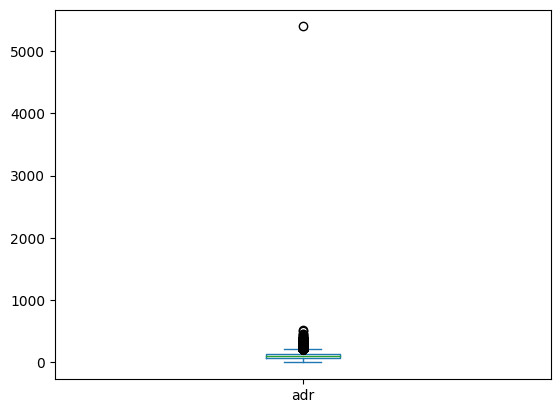

In [34]:
bookings_df['adr'].plot(kind='box')

In [35]:
bookings_df = bookings_df[bookings_df['adr'] < 5000]

# Exploratory Analysis and Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques.

> - **Compute the mean, sum, range and other interesting statistics for numeric columns**
> - **Explore distributions of numeric columns using histograms etc.**
> - **Explore relationship between columns using scatter plots, bar charts etc.**
> - **Make a note of interesting insights from the exploratory analysis**

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Booking Types: Canceled or Not Canceled
It'd be interesting to see the comparison between the total number of Canceled and Not Canceled bookings in this dataset just to get an idea of which one is the majority.

In [37]:
canceled_percentage = bookings_df['is_canceled'].value_counts(normalize=True)

canceled_percentage

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


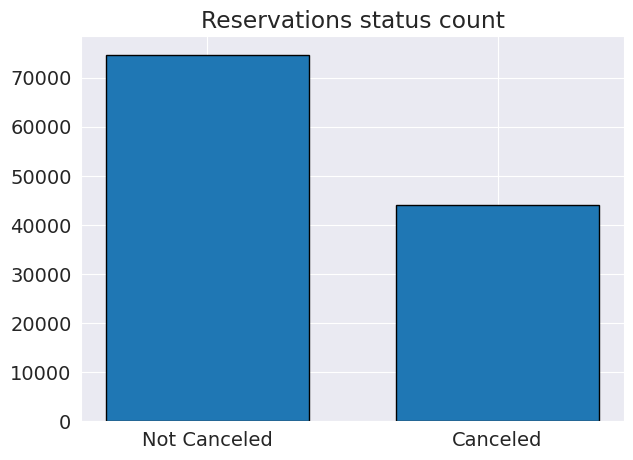

In [38]:
print(canceled_percentage)
plt.figure(figsize=(7,5))
plt.title("Reservations status count")
plt.bar(["Not Canceled","Canceled"], bookings_df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

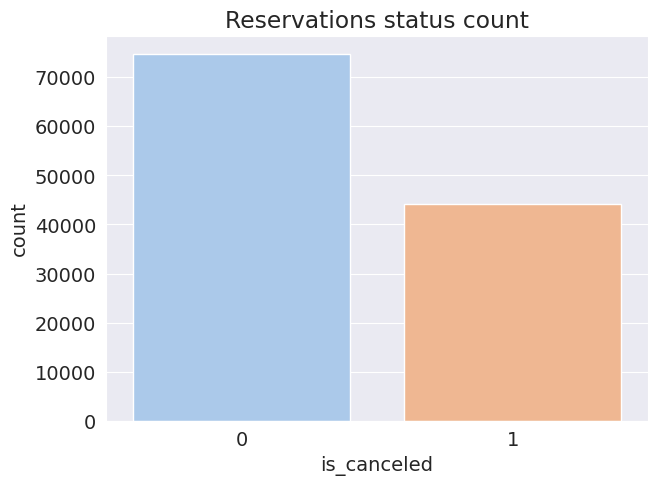

In [39]:
plt.figure(figsize=(7,5))
plt.title("Reservations status count")
plt.xlabel("Not Canceled")
plt.ylabel("Canceled")
g=sns.countplot(x=bookings_df['is_canceled'], palette="pastel");
plt.show()

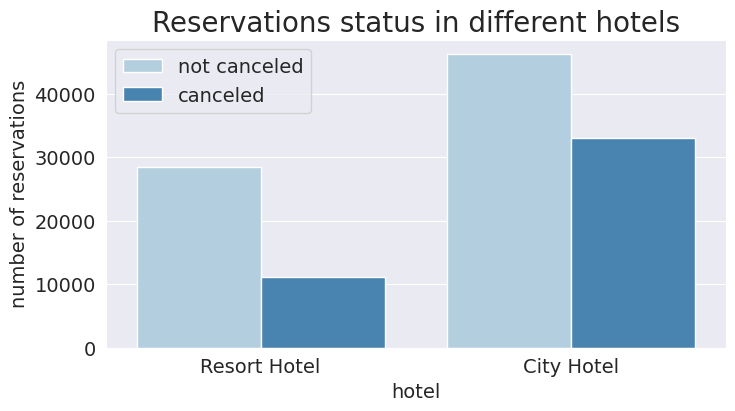

In [40]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=bookings_df, palette="Blues")
legend_lables, _ = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title("Reservations status in different hotels", size=20)
plt.xlabel("hotel")
plt.ylabel("number of reservations")
plt.legend(['not canceled', 'canceled'])

plt.show()

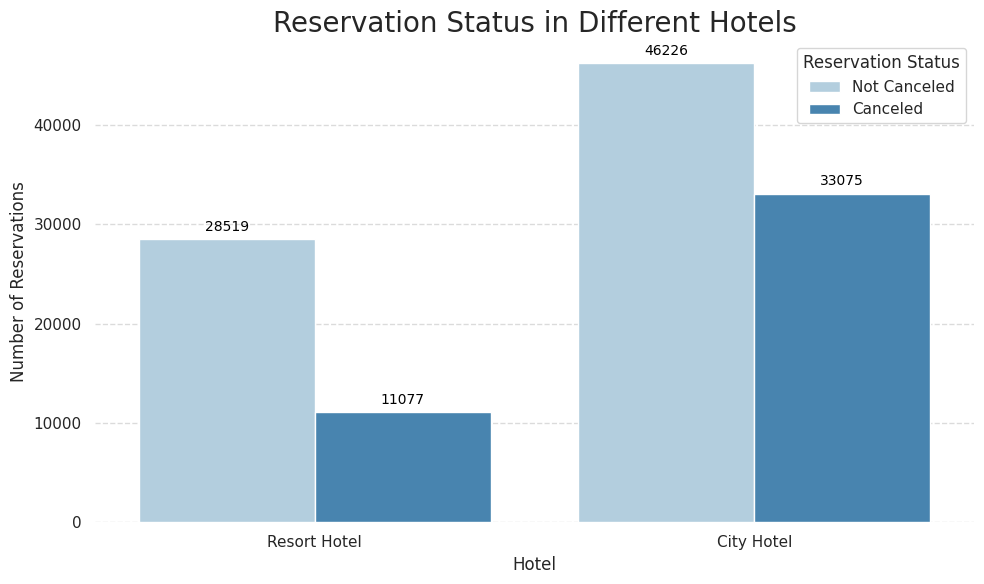

In [41]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=bookings_df, palette="Blues")

# Customize legend and labels
legend_labels, _ = ax1.get_legend_handles_labels()
plt.legend(legend_labels, ['Not Canceled', 'Canceled'], title='Reservation Status')
plt.title("Reservation Status in Different Hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")

# Customize tick labels rotation for better readability
plt.xticks(rotation=0)

# Customize grid and spines
ax1.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

# Adding data labels on top of bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9), textcoords = 'offset points', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [42]:
resort_hotel = bookings_df[bookings_df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [43]:
city_hotel = bookings_df[bookings_df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [44]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

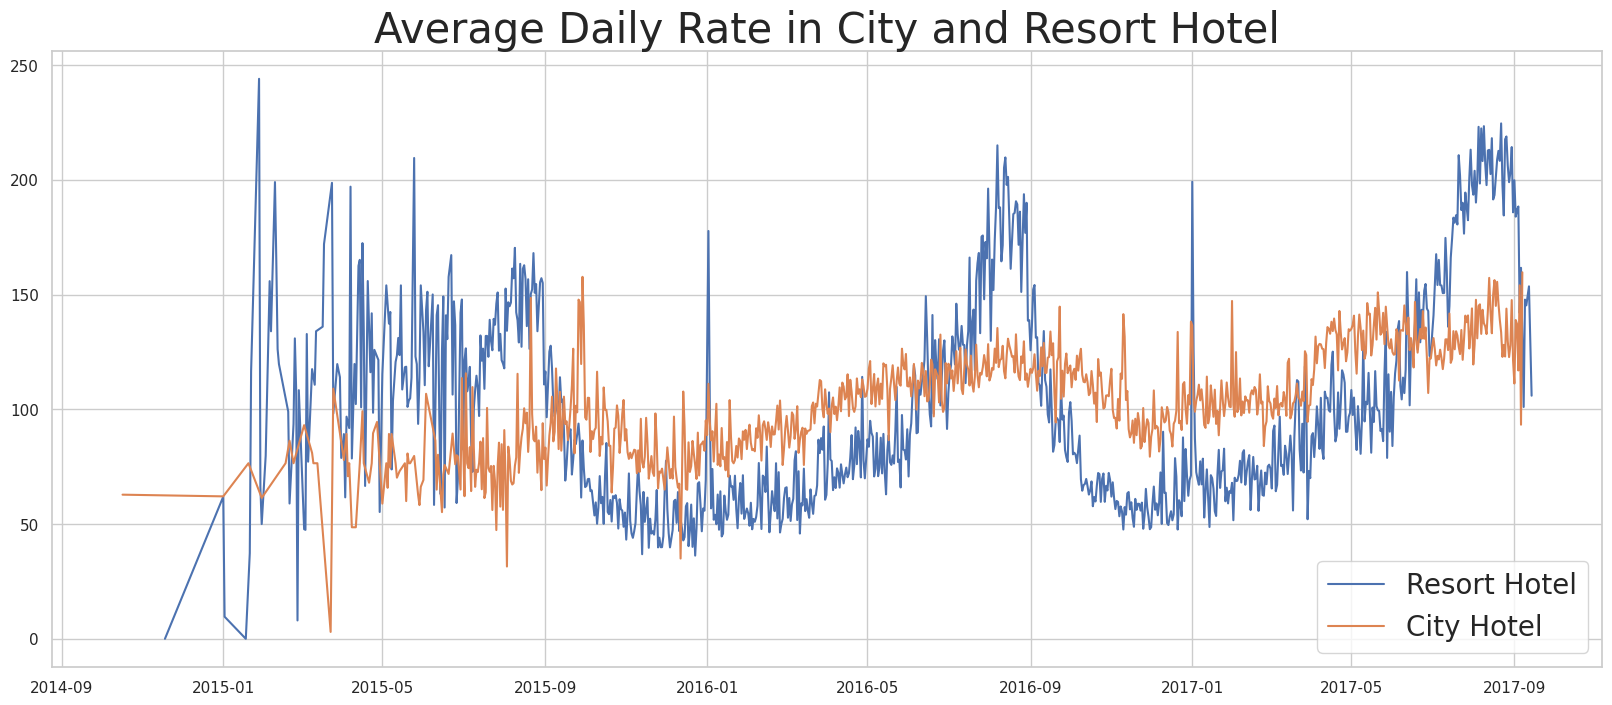

In [45]:
plt.figure(figsize = (20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

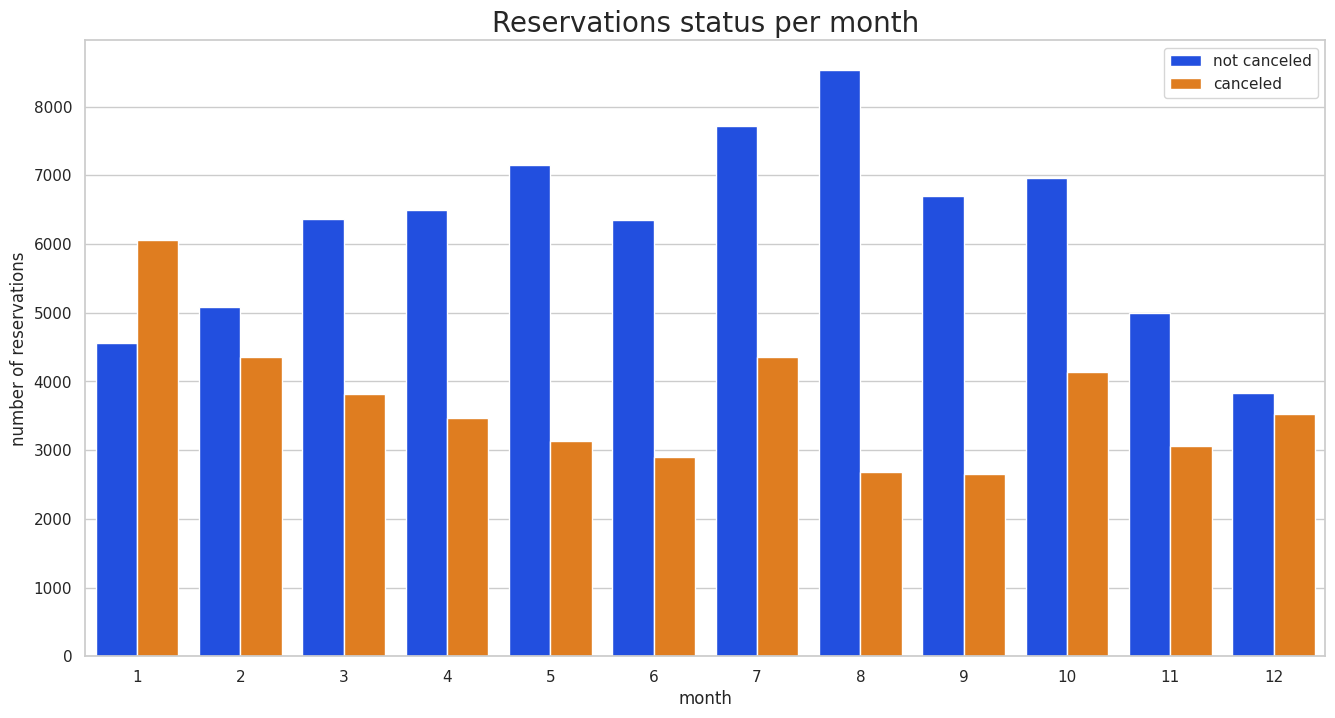

In [46]:
bookings_df['month'] = bookings_df['reservation_status_date'].dt.month
plt.figure(figsize = (16, 8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = bookings_df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservations status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

<ipython-input-47-47abb07080d8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='adr', data=cancelled_adr_per_month, ci=None)  # ci=None to remove error bars


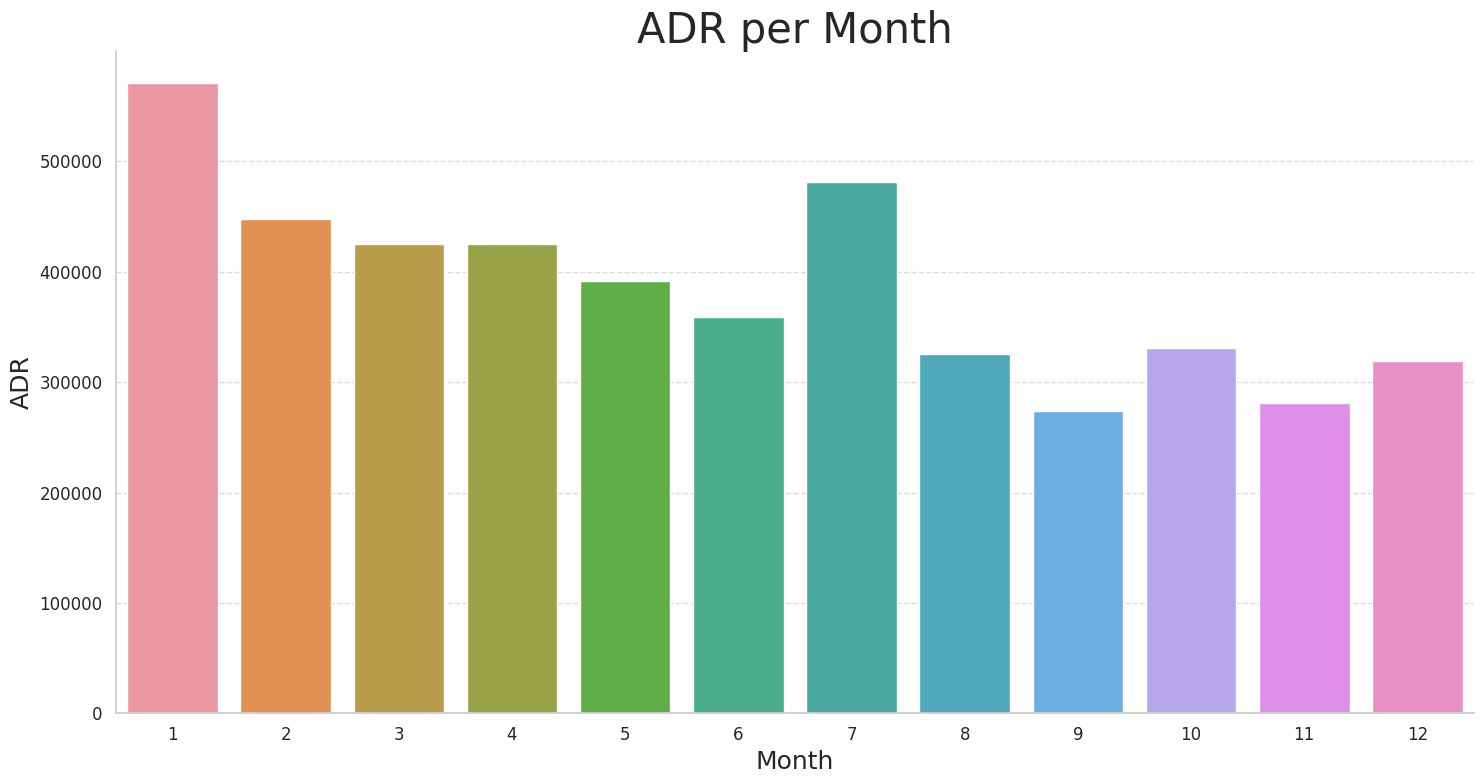

In [47]:

plt.figure(figsize=(15, 8))
plt.title('ADR per Month', fontsize=30)

# Grouping and aggregating the data
cancelled_adr_per_month = bookings_df[bookings_df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Using Seaborn's barplot with enhanced aesthetics
sns.set_palette("pastel")  # Using a softer color palette
sns.barplot(x='month', y='adr', data=cancelled_adr_per_month, ci=None)  # ci=None to remove error bars

# Adding some visual enhancements
plt.xlabel('Month', fontsize=18)
plt.ylabel('ADR', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)  # Removing top spine
plt.gca().spines['right'].set_visible(False)  # Removing right spine

plt.tight_layout()  # Adjusting layout for better spacing
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

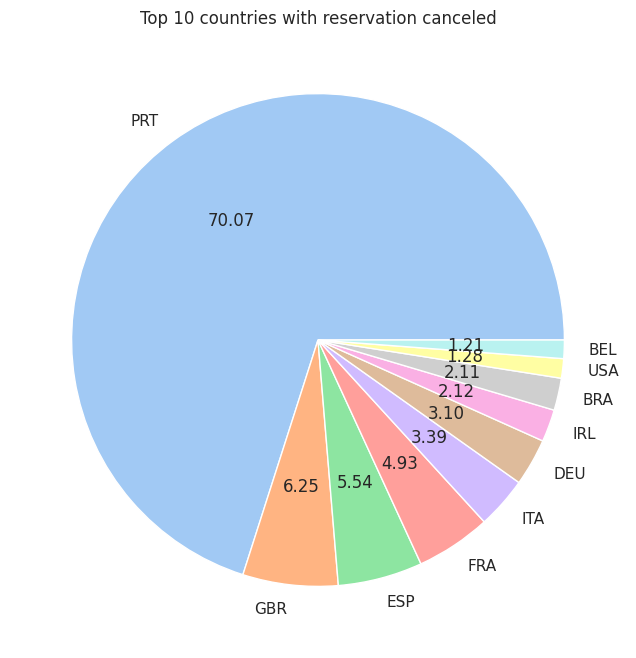

In [48]:
canceled_data = bookings_df[bookings_df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize = (8, 8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [49]:
bookings_df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [50]:
bookings_df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [51]:
canceled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

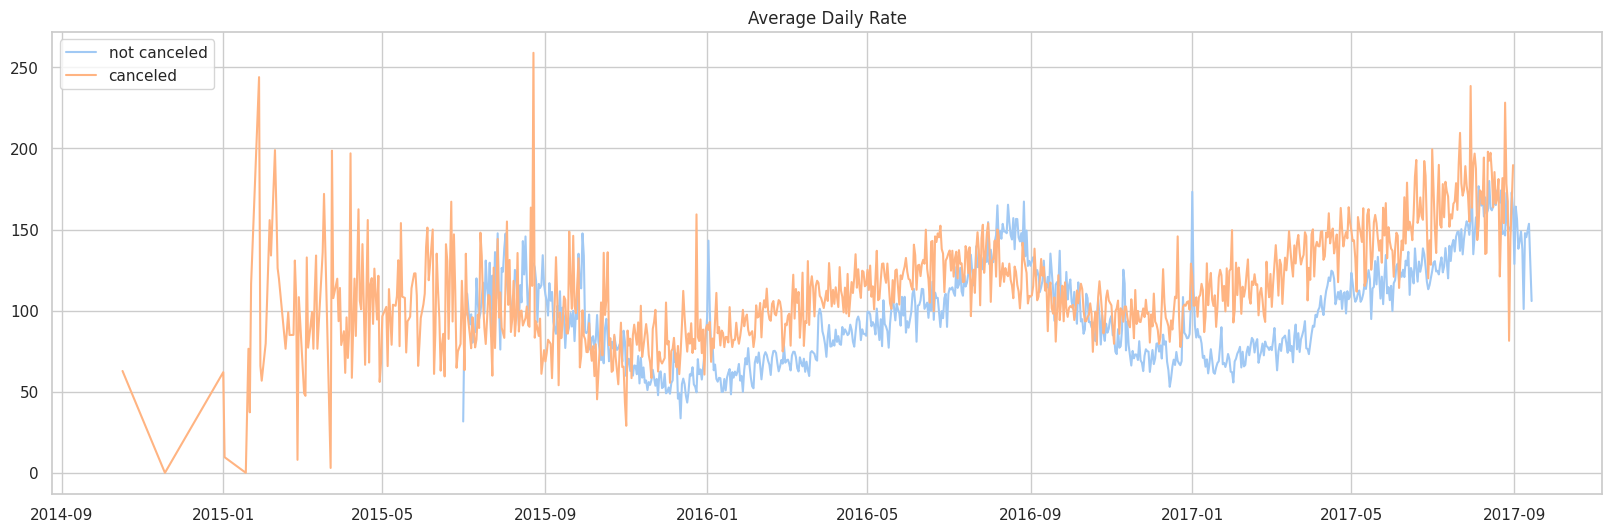

In [52]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values('reservation_status_date', inplace = True)


not_canceled_data = bookings_df[bookings_df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20, 6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend()